# NLP Yelp Review 

In this notebook, we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the Yelp Review Dataset.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business (i.e., the rating of the business by the person who wrote the review).  Higher stars is better.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive.  Basically, a "cool" vote is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## TASK 1: Read yelp.csv into a DataFrame

In [1]:
# data manipulation
import pandas as pd
import numpy as np
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and Metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# text analytics/NLP toolkits
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer


In [2]:
# read in CSV
df = pd.read_csv('yelp.csv')

## TASK 2: Perform some EDA \(exploratory data analysis\) on the DataFrame

Know your data before performing any feature engineering or machine learning on it.



In [3]:
# look at DF
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
# DF info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
# check column names
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [6]:
# Check star column values
df.stars.value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [7]:
# Check useful column values
df.useful.value_counts()

useful
0     4130
1     2848
2     1323
3      711
4      335
5      222
6      114
7       91
8       52
9       38
10      29
12      20
11      19
15      17
13      12
14       8
19       6
16       6
17       5
18       5
20       2
28       1
23       1
24       1
76       1
31       1
38       1
30       1
Name: count, dtype: int64

In [9]:
# check type column
df.type.unique()

array(['review'], dtype=object)

In [11]:
# new DF with columns dropped
df_work = df.drop(['business_id', 'review_id','user_id'], axis = 1)

In [12]:
# drop type column
df_work = df_work.drop(['type'], axis = 1)

In [13]:
# check DF
df_work

,date,stars,text,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0
...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,1,2,0
9996,2012-01-18,4,Should be called house of deliciousness!\r\n\r...,0,0,0
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,0,0
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,0,0


>### You can also do further EDA between stars and the time coulmn. For example, I can group stars by months or years to see if more or less stars are given at different times of the moth, seasons, or year. 

## TASK 3: Create a new DataFrame that only contains the 5-star and 1-star reviews

In [14]:
# new DF with only 5 or 1 stars
df_best_worst = df_work[(df_work.stars == 5)|(df_work.stars == 1)]
df_best_worst.sample(10)

,date,stars,text,cool,useful,funny
8989,2012-04-30,5,Originally came by to get a watering system fo...,0,2,0
4721,2010-10-26,5,I love the always smiling crew and food is del...,0,0,0
8246,2011-10-02,5,prepare to spend a few hours here and really h...,1,1,1
4593,2011-10-09,5,"Delish!!!!!! x 100!!\r\n\r\nLove, love, love t...",0,0,0
4503,2009-12-31,5,This is the second time I've eaten here and it...,1,2,1
402,2011-08-12,5,Once again Wildflower proves why it's my favor...,1,1,2
2603,2011-04-27,5,I have totally fallen in love at Tuck Shop. E...,0,1,1
9308,2012-02-28,1,I always have customer service problems with F...,0,1,2
1257,2009-07-15,5,"I agree with Tracy, my wife and I are big fans...",0,0,0
8599,2009-05-21,5,I was hoping to be the first to review Grayhaw...,0,2,0


In [15]:
# check the stars colmn for 5 or 1 stars
df_best_worst.stars.unique()

array([5, 1])

In [16]:
# check shape of DF
df_best_worst.shape

(4086, 6)

## TASK 4: Split the new DataFrame into training and testing sets

In [102]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(df_best_worst.text, df_best_worst.stars, random_state = 1)

In [18]:
# check x train shape
X_train.shape

(3064,)

In [19]:
# check x test shape
X_test.shape

(1022,)

## TASK 5: Use CountVectorizer to create document-term matrices from X_train and X_test

Use CountVectorizer to create document-term matrices from X_train and X_test (i.e., convert a collection of text documents to a matrix of token counts).

If you run into a decoding error, instantiate the vectorizer with the argument decode_error='ignore'



In [20]:
# Instantiate CountVectorizer object; include 1/2 ngrams with at least 2 occurances and no stop words in features
vect = CountVectorizer(ngram_range=(1, 2), min_df=2, stop_words='english')

In [21]:
# fit to X_train and transform on X_train and X_test
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

In [22]:
# display train dtm
train_dtm

<3064x21629 sparse matrix of type '<class 'numpy.int64'>'
	with 178853 stored elements in Compressed Sparse Row format>

In [23]:
# display test dtm
test_dtm

<1022x21629 sparse matrix of type '<class 'numpy.int64'>'
	with 52834 stored elements in Compressed Sparse Row format>

## TASK 6: Use Naive Bayes to predict the star rating for the testing set, and calculate accuracy

Accuracy is a measure of the overall correctness of the model's predictions.  It is calculated as the ratio of correctly predicted instances to the total number of instances.

In [24]:
# Call NB object
nb = MultinomialNB()
nb.fit(train_dtm, y_train)

# Produce the predicted y's for the test
y_pred = nb.predict(test_dtm) 

In [25]:
y_pred

array([5, 5, 5, ..., 5, 1, 5])

In [26]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9246575342465754


## TASK 7: Calculate the AUC

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

1. Make sure to pass the predicted probabilities to roc_auc_score, not the predicted classes.
1. roc_auc_score() will get confused if y_test contains ones and fives, so you will need to create a new object that contains  zeros and ones instead.

* The AUC measures the ability of the model to distinguish between the positive & negative classes.
* The higher the AUC, the better performance of the model at distinguishing between them.



In [27]:
# Y prediction probabilites
pred_proba = nb.predict_proba(test_dtm)[:, 1]

Text(0, 0.5, 'Frequency')

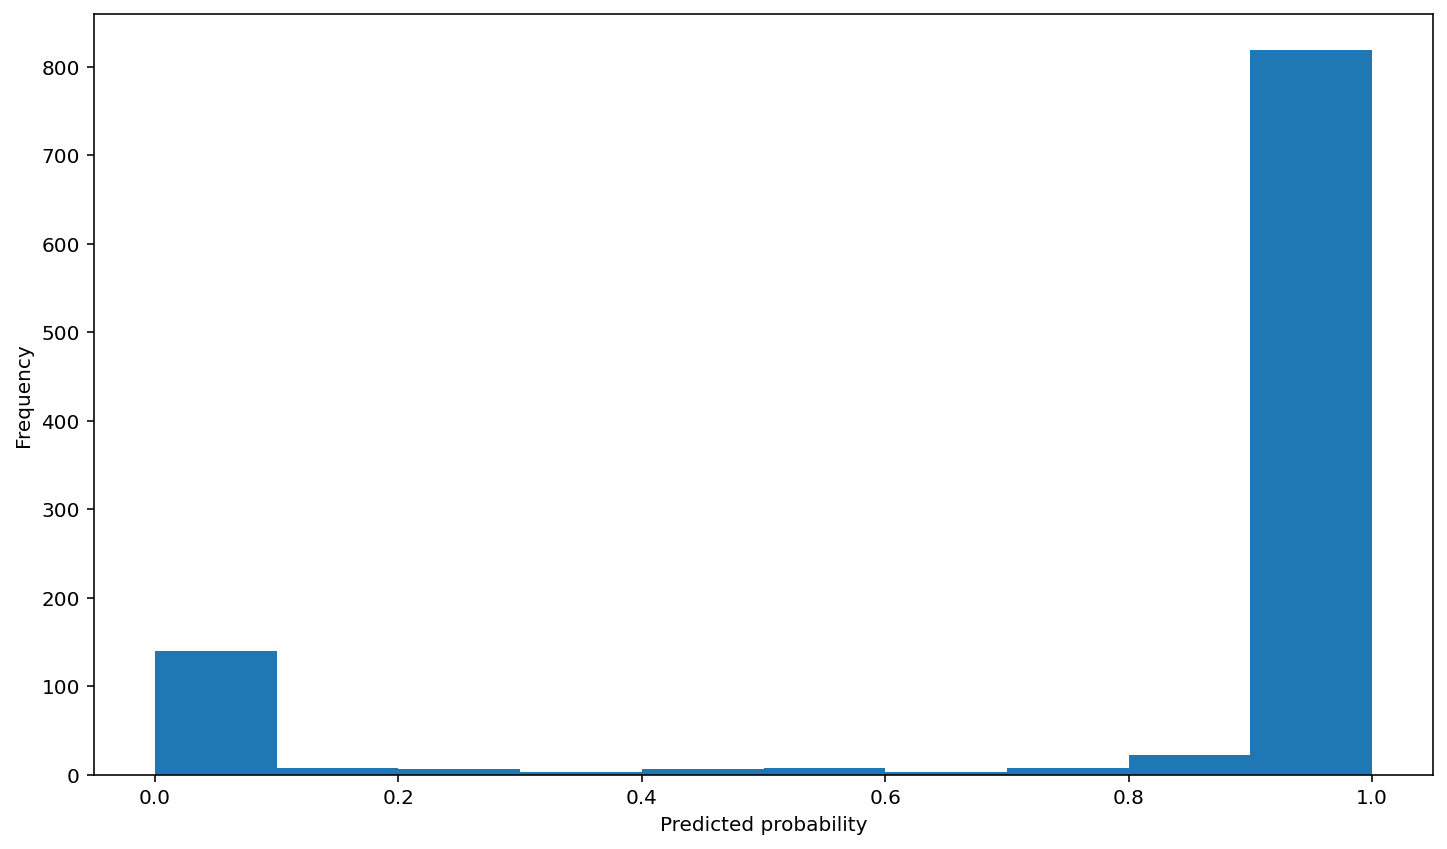

In [78]:
import matplotlib.pyplot as plt
plt.hist(pred_proba)
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [28]:
# boolean mask for 5 stars and 1 stars
y_test_binary = np.where(y_test==5, 1,0)

In [29]:
# AUC score
metrics.roc_auc_score(y_test_binary, pred_proba)

0.946138580471101

## TASK 8: Plot the ROC curve

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, pred_proba)

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

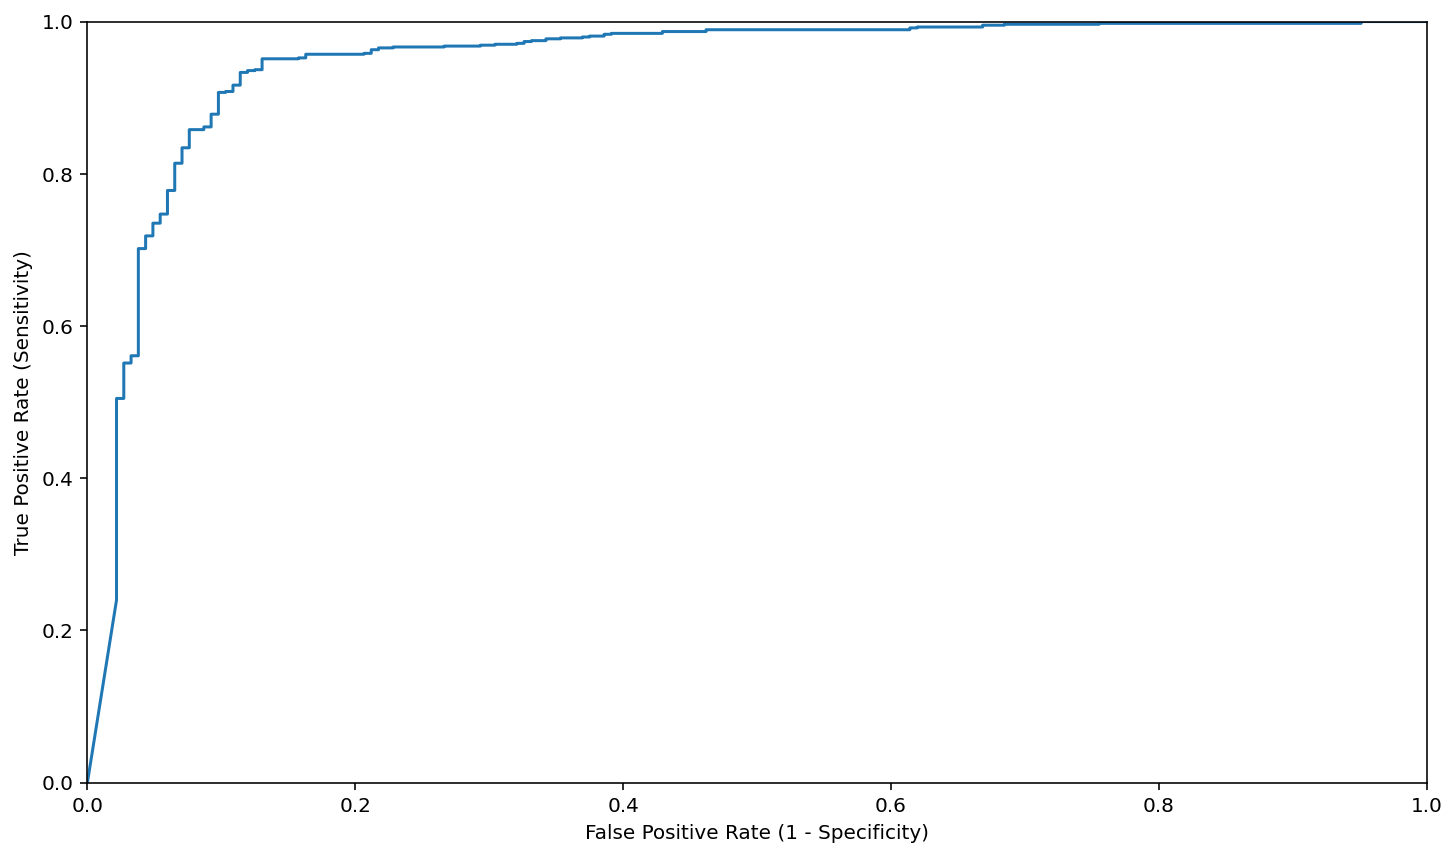

In [31]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## TASK 9: Print the confusion matrix, and calculate sensitivity, specificity, and precision

For both the test and training datasets.  So, print two separate confusion matrices.  For the training dataset, you'll be making predictions on the vectorized X_train data, and then comparing the training predictions against the ground truth.

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
nb_classifier = MultinomialNB()

### Test Dataset

[[157  27]
 [  0 838]]


<Axes: >

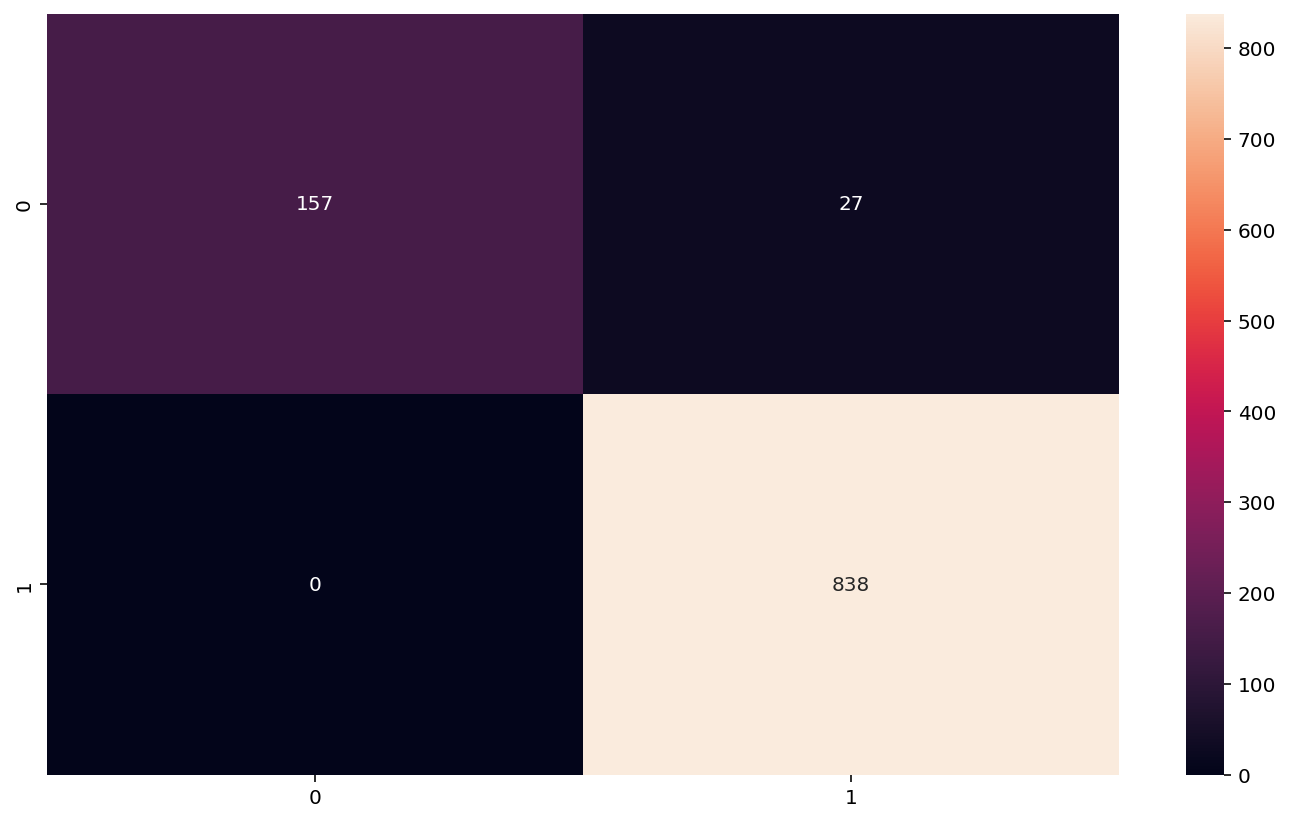

In [34]:
# Test Confusion Matrix
nb_classifier.fit(test_dtm, y_test)

y_pred_test = nb_classifier.predict(test_dtm)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')

In [35]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_test)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           1       1.00      0.85      0.92       184
           5       0.97      1.00      0.98       838

    accuracy                           0.97      1022
   macro avg       0.98      0.93      0.95      1022
weighted avg       0.97      0.97      0.97      1022



In [36]:
# Sensitivity = True_Pos / (True_Pos + False_Neg) AKA RECALL
print(838/(838+0))
# Specificity = True_Neg / (True_Neg + False_Pos)
print(157/(157+27))
#   Precision = True_Pos / (True_Pos + False Pos)
print(838/(838+27))

1.0
0.8532608695652174
0.96878612716763


### Training Dataset

[[ 549   16]
 [  32 2467]]


<Axes: >

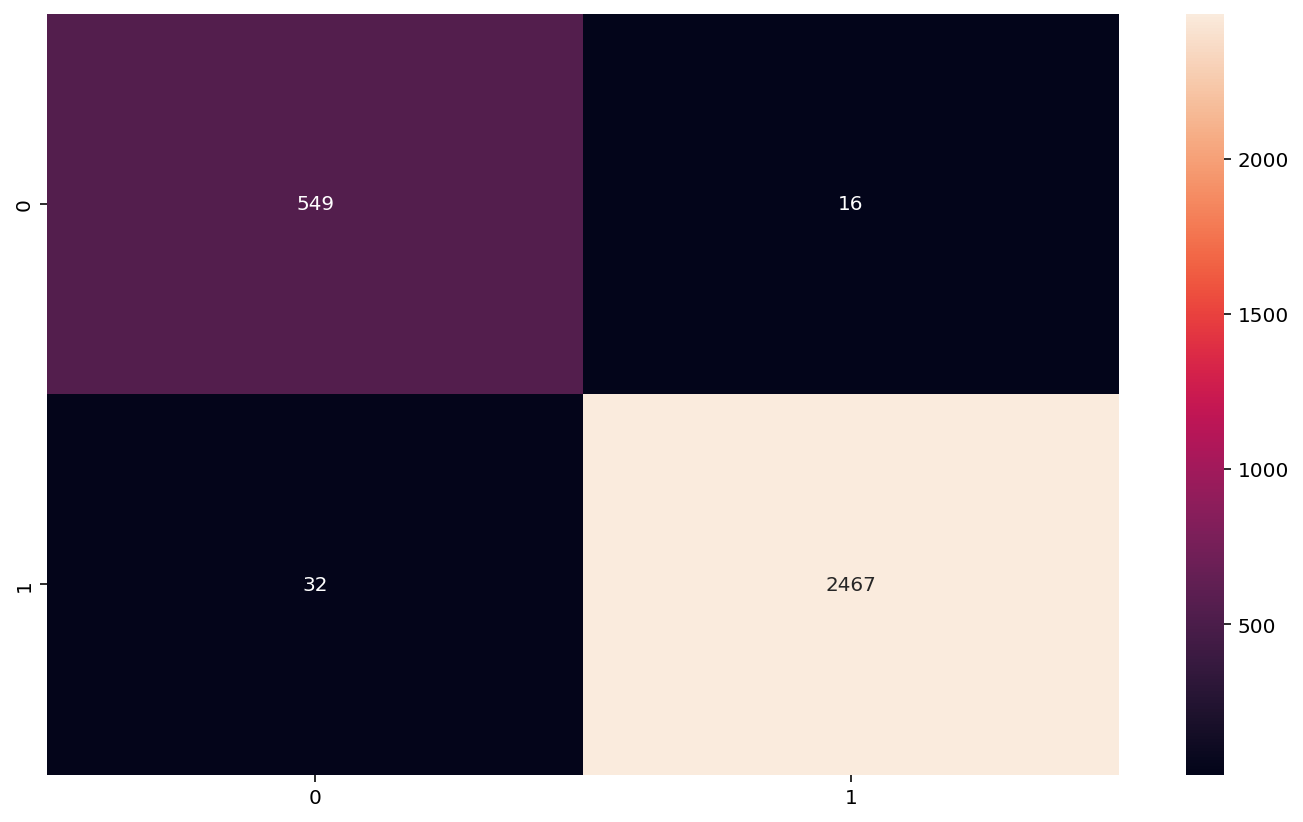

In [37]:
# training dataset confusion matrix
nb_classifier = MultinomialNB()
nb_classifier.fit(train_dtm, y_train)

y_pred_train = nb_classifier.predict(train_dtm)

cm = confusion_matrix(y_train, y_pred_train)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')

In [38]:
# Generate classification report
report = classification_report(y_train, y_pred_train)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           1       0.94      0.97      0.96       565
           5       0.99      0.99      0.99      2499

    accuracy                           0.98      3064
   macro avg       0.97      0.98      0.97      3064
weighted avg       0.98      0.98      0.98      3064



In [39]:
# Sensitivity = True_Pos / (True_Pos + False_Neg) AKA RECALL
print(2467/(2467+32))
# Specificity = True_Neg / (True_Neg + False_Pos)
print(549/(549+16))
#   Precision = True_Pos / (True_Pos + False Pos)
print(2467/(2467+16))

0.9871948779511804
0.9716814159292035
0.9935561820378574


## TASK 10: Browse the review text for the false positive and false negatives



In [40]:
# Define a function that accepts text and returns the polarity
def detect_sentiment(text):
    blob = TextBlob(text).sentiment.polarity
    return blob

In [41]:
# Create a new DataFrame column for sentiment
df_work['sentiment'] = df_work.text.apply(detect_sentiment)
df_work.head(3)

,date,stars,text,cool,useful,funny,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,0.402469
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,0.229773
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,0.566667


In [42]:
# Negative sentiment in a 5-star review (FALSE POSITIVE)
df_work[(df_work.stars == 5) & (df_work.sentiment < -0.3)].head()

,date,stars,text,cool,useful,funny,sentiment
390,2009-08-06,5,RIP AZ Coffee Connection. :( I stopped by tw...,1,0,0,-0.302083
1287,2008-08-28,5,"Obsessed. Like, I've-got-the-Twangy-Tart-withd...",3,3,5,-0.625000
3075,2011-12-05,5,Unfortunately Out of Business.,0,2,0,-0.500000
3516,2009-12-19,5,"Cashew brittle, almond brittle, bacon brittle!...",9,8,6,-0.375000
6726,2012-08-13,5,"Brown bag chicken sammich, mac n cheese, fried...",0,0,0,-0.600000


In [43]:
# Positive sentiment in a 1-star review (FALSE NEGATIVE)
df_work[(df_work.stars == 1) & (df_work.sentiment > 0.3)].head()

,date,stars,text,cool,useful,funny,sentiment
299,2008-07-16,1,How does this restaurant generate so many 4 an...,0,3,0,0.376190
715,2009-11-09,1,What's with the cheese? It isn't even Velveta...,0,0,0,0.491667
1299,2012-06-18,1,Cool place but don't try to arrange a special ...,0,0,0,0.398214
1781,2012-06-22,1,If you like the stuck up Scottsdale vibe this ...,0,1,2,0.766667
2353,2006-08-23,1,"My co-workers and I refer to this place as ""Pi...",0,1,0,0.567143


## TASK 11: Change the threshold to balance sensitivity and specificity

In the performance metrics of the training dataset.



In [111]:
# Calculate predicted probabilities
y_pred_prob = nb_classifier.predict_proba(train_dtm)[:, 1]

# Choose a new threshold (e.g., 0.3)
new_threshold = 0.3

# Convert probabilities to class labels based on the new threshold
y_pred_new = (y_pred_prob >= new_threshold).astype(int)

# Now evaluate the model using the updated predictions

In [112]:
y_train.shape

(3064,)

In [113]:
y_pred_new.shape

(3064,)

In [114]:
# Generate classification report
report = classification_report(y_train, y_pred_new)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.01      0.04      0.02       565
           5       0.00      0.00      0.00      2499

    accuracy                           0.01      3064
   macro avg       0.00      0.01      0.01      3064
weighted avg       0.00      0.01      0.00      3064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

<span style='font-size:x-large'>Vang's Task 11</span>


Text(0, 0.5, 'Frequency')

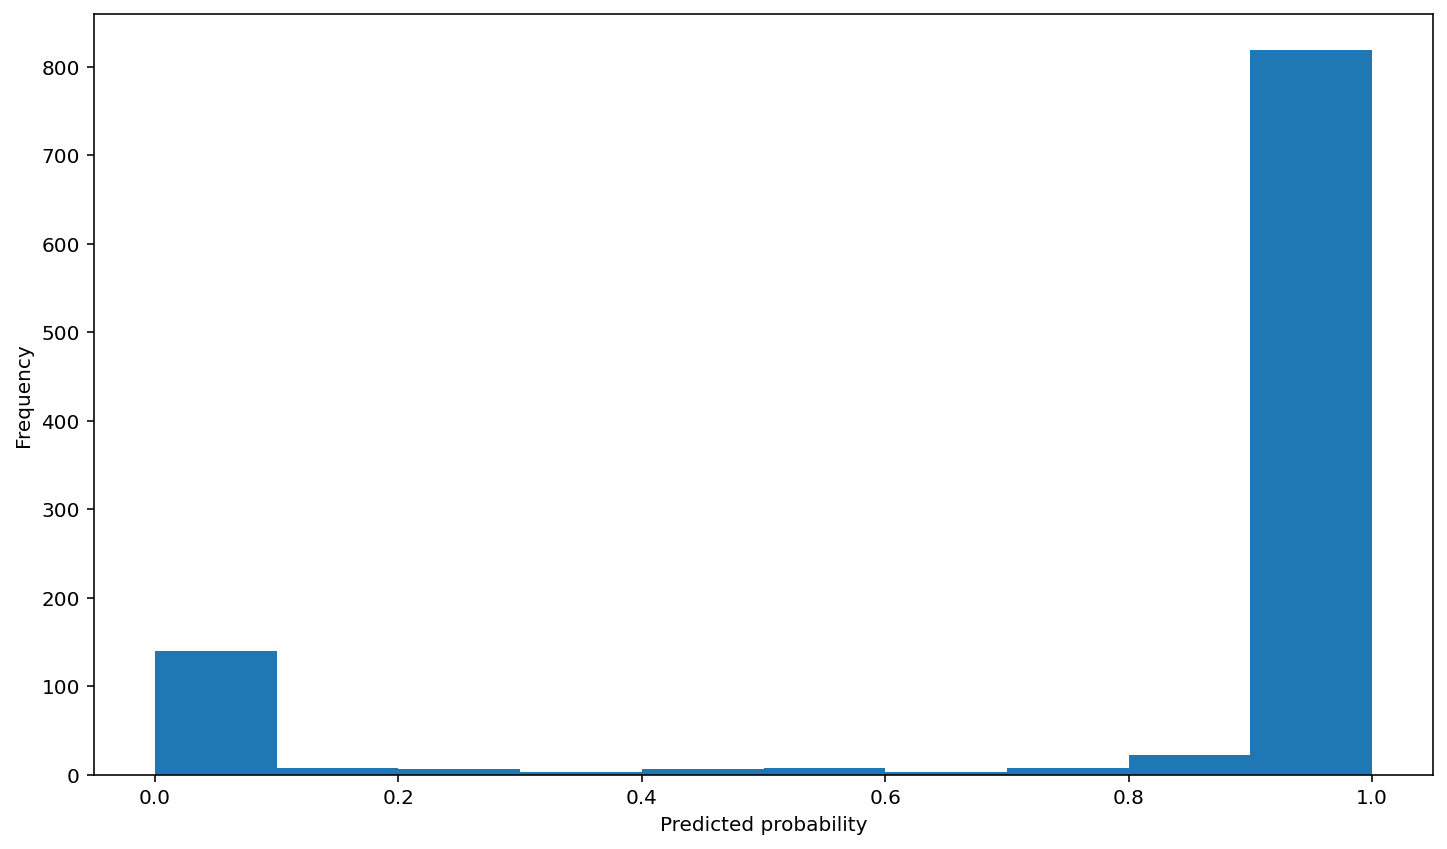

In [81]:
plt.hist(pred_proba)
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [105]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
#y_pred_class = binarize(y_pred_prob, 0.25)
y_pred_class = binarize(pred_proba.reshape(1, -1), threshold=0.10) # 0.10 is threshold
y_pred_class

array([[1., 1., 1., ..., 1., 0., 1.]])

In [106]:
y_test

3922    5
8379    5
4266    5
5577    5
537     5
       ..
6846    5
1588    5
8451    5
7903    5
8255    5
Name: stars, Length: 1022, dtype: int64

In [107]:
print (metrics.confusion_matrix(y_test[0:], y_pred_class[0]))

[[  0   0   0]
 [121  63   0]
 [ 19 819   0]]


In [116]:
# Generate classification report
report = classification_report(y_test, y_pred_class[0])

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.07      0.34      0.12       184
         5.0       0.00      0.00      0.00       838

    accuracy                           0.06      1022
   macro avg       0.02      0.11      0.04      1022
weighted avg       0.01      0.06      0.02      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

## TASK 12: Assign sentiment classes

Restricting our training and test datasets solely to 1- and 5-star reviews may be overly restrictive, leading to a reduction in the quantity of data available for model training and evaluation. Considering a broader range of reviews could provide a more comprehensive understanding of the data and potentially enhance the model's ability to generalize across various sentiments and rating levels.

For each review in the DataFrame, assign the sentiment class to split the reviews on positive or negative, and create a target label.

* rating = 4.0 and 5.0 --> class = 1
* rating < 2.0 --> class = 0
* rating = 3.0 --> do not include, neutral assessment

The final DataFrame should only have the following columns:  ['date', 'stars', 'text', 'sentiment'], and display the last 15 reviews in the DataFrame.



In [46]:
# Removing unnecessary columns
df_final = df.drop(['business_id','review_id','type','user_id','cool','useful','funny'], axis = 1)
df_final.head()

,date,stars,text
0,2011-01-26,5,My wife took me here on my birthday for breakf...
1,2011-07-27,5,I have no idea why some people give bad review...
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...


In [47]:
# new DF with only 4/5 or 1/2 stars
df_broad = df_final[(df_final.stars != 3)]
df_broad.stars.value_counts()

stars
4    3526
5    3337
2     927
1     749
Name: count, dtype: int64

In [48]:
# Experimenting with sentiment; IT WAS WRONG
# df_broad['sentiment'] = df_broad['stars'].apply(lambda x: 1 if x >=4 else 0)

In [49]:
# Assigning sentiment values based on text
# df_broad['sentiment'] = df_broad.text.apply(detect_sentiment) ; gave us warning about changing copy

df_broad.loc[:, 'sentiment'] = df_broad['text'].apply(detect_sentiment)
df_broad.head()

/tmp/ipykernel_6338/3964336791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broad.loc[:, 'sentiment'] = df_broad['text'].apply(detect_sentiment)


,date,stars,text,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,0.402469
1,2011-07-27,5,I have no idea why some people give bad review...,0.229773
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0.566667
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0.608646
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0.468125


## TASK 13 (BONUS): Use a RandomForestClassifier to predict the star rating for the testing set, and calculate accuracy

In [50]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(df_broad.sentiment, df_broad.stars, random_state = 2)

In [51]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
# Initializing our model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Converting X_train series to DF because rf_classifier expects DF, not series
X_train_df = X_train.to_frame() 

# Training our model with DF
rf_classifier.fit(X_train_df, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Converting X_test series to DF, because RF_classifier expects DF
X_test_df = X_test.to_frame()

# predicting Star ratings with RF_classifier
y_pred_final = rf_classifier.predict(X_test_df)

In [54]:
# Calculating Accuracy score
accuracy_score(y_test, y_pred_final) # Using sentiment to predict Star rating is not accurate, not recommended

0.4163934426229508

<span style='font-size:large'>**Trying with TF\_IDF technique**</span>


In [55]:
df_broad

,date,stars,text,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,0.402469
1,2011-07-27,5,I have no idea why some people give bad review...,0.229773
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0.566667
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0.608646
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0.468125
...,...,...,...,...
9994,2012-03-19,5,Let's see...what is there NOT to like about Su...,0.070609
9996,2012-01-18,4,Should be called house of deliciousness!\r\n\r...,0.375541
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0.264633
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,-0.082366


In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_broad.text, df_broad.stars, random_state = 3)

In [57]:
# Convert text data into numerical features using TF-IDF vectorization
vect = TfidfVectorizer(ngram_range=(1,2), max_features=100000, min_df=2, stop_words='english')
X_train_tfidf = vect.fit_transform(X_train2)
X_test_tfidf = vect.transform(X_test2)

In [58]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)
rf_classifier.fit(X_train_tfidf, y_train2)

RandomForestClassifier(random_state=4)

In [59]:
# Predict star ratings for the testing set
y_pred = rf_classifier.predict(X_test_tfidf)

In [60]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.38548009367681496

<span style='font-size:x-large'>**Trying RF Classifier with sentiment class instead of sentiment values**</span>


In [61]:
df_broad.loc[df_broad['stars'] >= 4, 'sentiment_class'] = 1
df_broad.loc[df_broad['stars'] < 4, 'sentiment_class'] = 0

/tmp/ipykernel_6338/1203382480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broad.loc[df_broad['stars'] >= 4, 'sentiment_class'] = 1


In [62]:
# Newtrain test splits using sentiment classes
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_broad.sentiment_class, df_broad.stars, random_state = 4)

In [63]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)

X_train3_df = X_train3.to_frame()

rf_classifier.fit(X_train3_df, y_train3)

RandomForestClassifier(random_state=4)

In [64]:
X_test3_df = X_test3.to_frame()

# Predict star ratings for the testing set
y_pred3 = rf_classifier.predict(X_test3_df)

In [65]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.3414519906323185

## TASK 14 (BONUS): 5-class classification on the original DataFrame



In [66]:
X = df['text']  # Features
y = df['stars']  # Target variable

In [67]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, random_state=5)

In [68]:
# Select a Classification Model
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Initialize a Random Forest classifier
clf = RandomForestClassifier()

In [70]:
# Train the Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [71]:
# Create a pipeline with TF-IDF vectorizer and classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', clf)
])

In [72]:
# Train the model
pipeline.fit(X_train5, y_train5)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [73]:
# Evaluate the Model
from sklearn.metrics import classification_report

In [74]:
# Predict on the testing data
y_pred5 = pipeline.predict(X_test5)

In [75]:
# Evaluate the model
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           1       0.80      0.06      0.12       191
           2       0.50      0.01      0.02       220
           3       0.42      0.02      0.04       379
           4       0.40      0.68      0.50       890
           5       0.51      0.59      0.54       820

    accuracy                           0.44      2500
   macro avg       0.53      0.27      0.24      2500
weighted avg       0.48      0.44      0.37      2500

